In [1]:
from binn.NN import BINN

# Create the model
model = BINN(
            input_data  = 'data/TestQM.csv', 
            pathways = 'data/pathways.tsv',
            translation_mapping  = 'data/translation.tsv',
            input_data_column = 'Protein',
            activation ='tanh', 
            learning_rate  = 1e-4, 
            n_layers  = 4, 
            scheduler = 'plateau',
            optimizer = 'adam',
            validate  = False,
            n_outputs = 2)

/home/erikh/BINN/BINN/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of reactome ids before subsetting: 3484
Unique proteins in reactome df: 458
Function called 1 times.
Values in idx_list: 0
Function called 2 times.
Values in idx_list: 652
Function called 3 times.
Values in idx_list: 989
Function called 4 times.
Values in idx_list: 1173
Function called 5 times.
Values in idx_list: 1264
Function called 6 times.
Values in idx_list: 1304
Function called 7 times.
Values in idx_list: 1322
Function called 8 times.
Values in idx_list: 1328
Function called 9 times.
Values in idx_list: 1329
Base case reached
Final number of unique connections in pathway:  1003
Network:  DiGraph with 1015 nodes and 1031 edges
Number of copies made for 4 layers: 26


In [2]:
# Train the model
import pandas as pd
from UtilForExamples import fit_protein_matrix_to_network_input, generate_data
import torch
from pytorch_lightning import Trainer

design_matrix = pd.read_csv('data/design_matrix.tsv', sep="\t")
protein_matrix = pd.read_csv('data/TestQM.csv')

protein_matrix = fit_protein_matrix_to_network_input(
    protein_matrix, features=model.RN.inputs)

X, y = generate_data(protein_matrix, design_matrix=design_matrix)

dataloader = torch.utils.data.DataLoader(dataset=torch.utils.data.TensorDataset(torch.Tensor(X), torch.LongTensor(y)),
                                            batch_size=8,
                                            num_workers=12,
                                            shuffle=True)
trainer = Trainer(max_epochs=20)
trainer.fit(model, dataloader)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/erikh/BINN/BINN/test-venv/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1764: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
/home/erikh/BINN/BINN/test-venv/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:107: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name   | Type             | Params
--------------------------------------------
0 | layers | Sequential       | 364 K 
1 | loss   | CrossEntropyLoss | 0     
--------------------------------------------
364 K     Trainable params
0         Non-trainable params
364 K     Total params
1.457     Total estimated model params size (MB)
/home/erikh/BINN/BINN/

Epoch 19: 100%|██████████| 25/25 [00:00<00:00, 49.15it/s, loss=0.354, v_num=13, train_loss=0.352, train_acc=0.893]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 25/25 [00:00<00:00, 46.82it/s, loss=0.354, v_num=13, train_loss=0.352, train_acc=0.893]


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


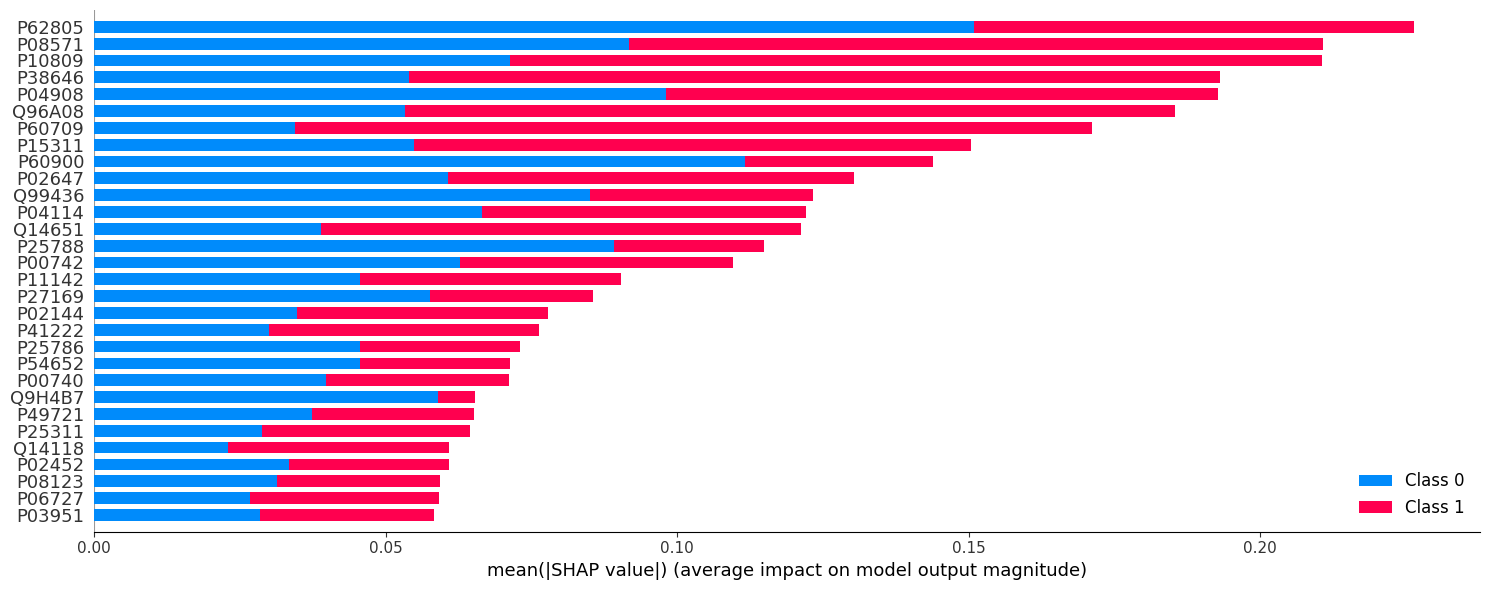

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


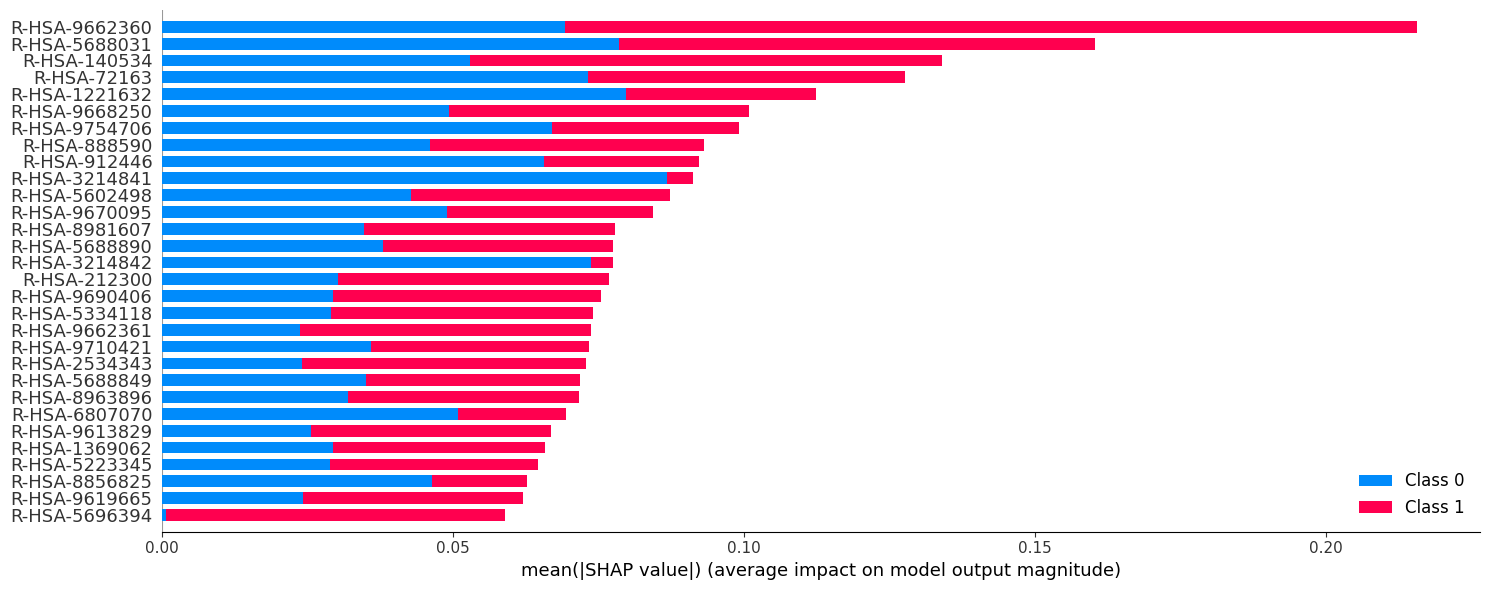

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


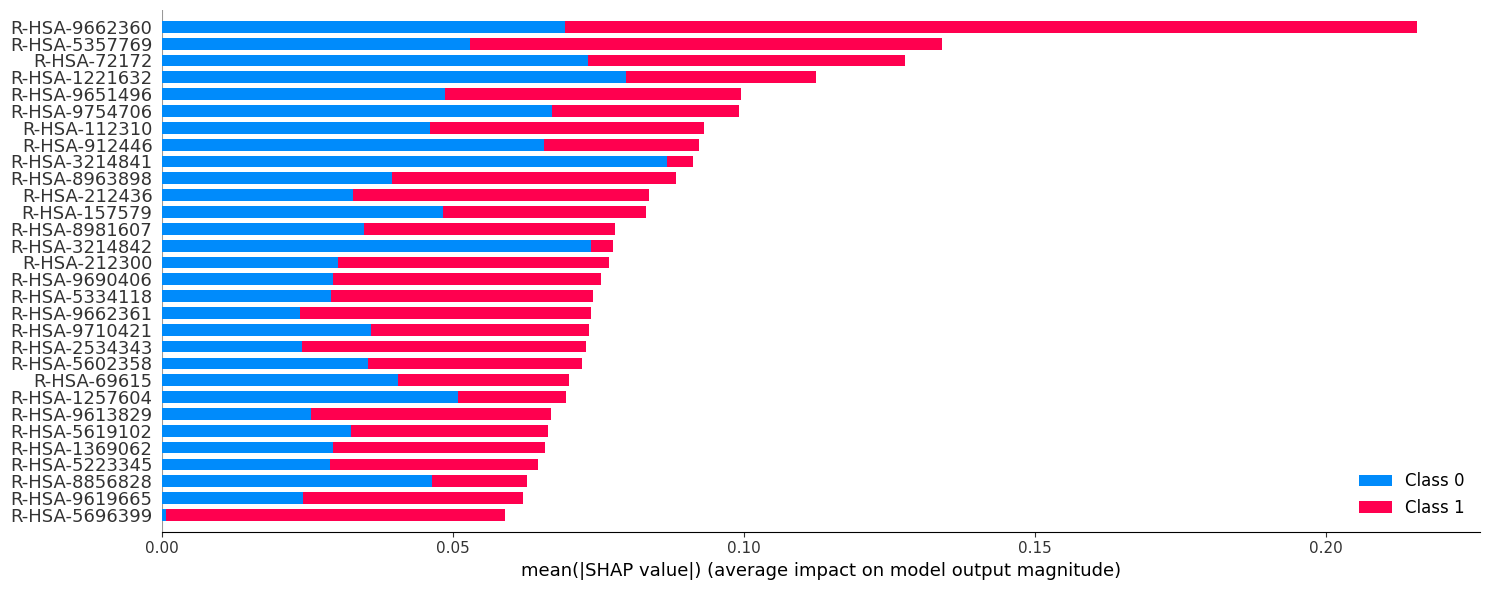

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


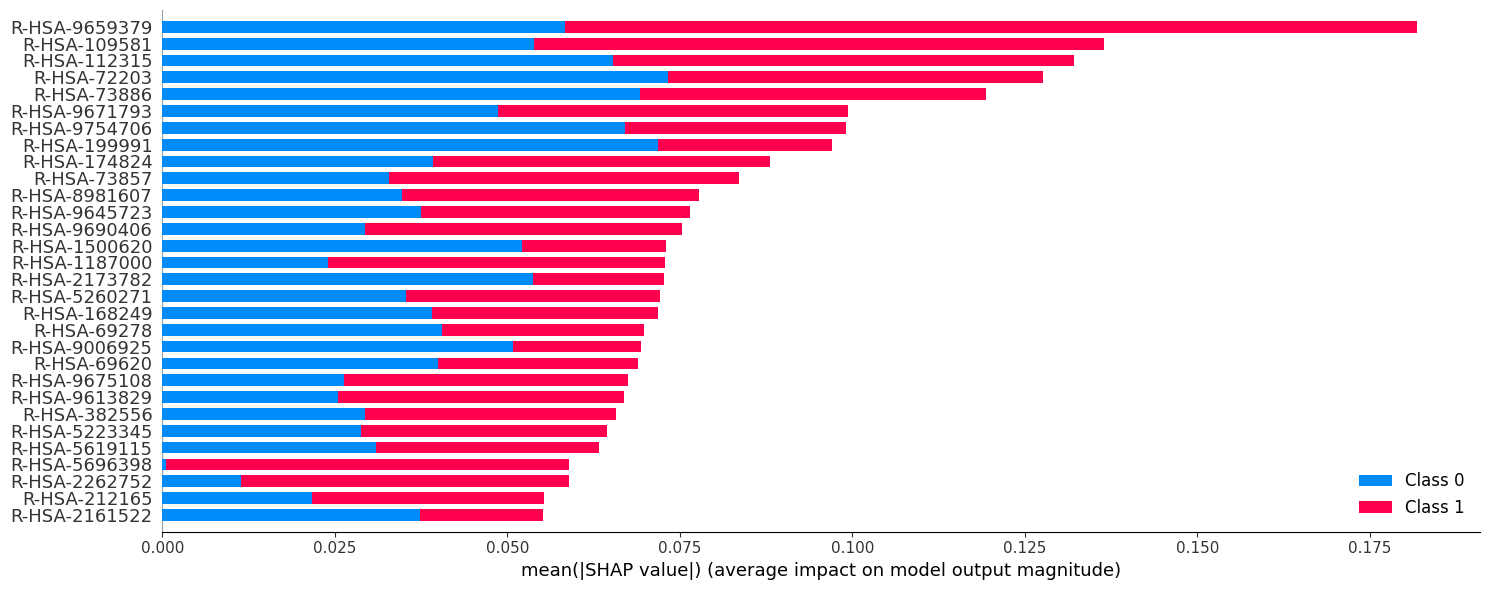

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


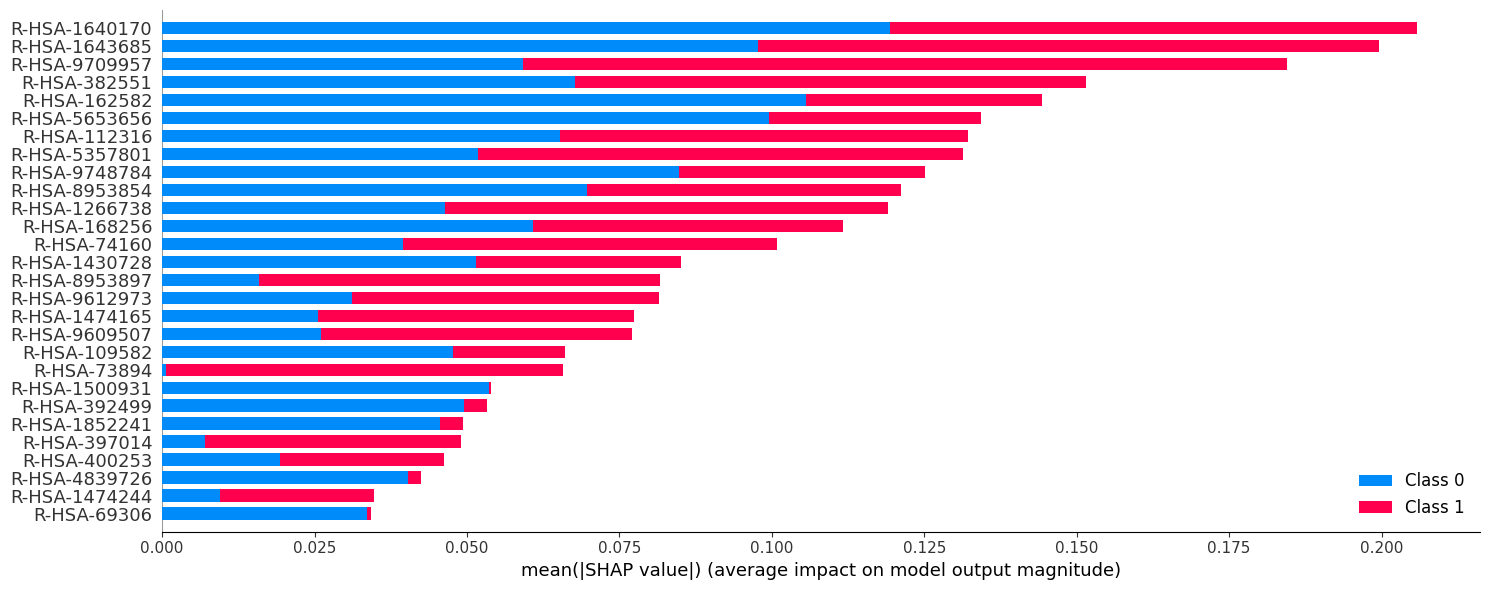

Number of copies made for 4 layers: 26


<Figure size 640x480 with 0 Axes>

In [3]:
from binn.ShapExplainer import ExplainBINN

test_data = torch.Tensor(X)
background_data = torch.Tensor(X)


df = ExplainBINN(model, test_data, background_data)

In [4]:
df

,source,target,value,type,source layer,target layer
0,A0M8Q6_0,R-HSA-166663_1,0.012610,0,0,1
1,A0M8Q6_0,R-HSA-166663_1,0.008678,1,0,1
2,A0M8Q6_0,R-HSA-977606_1,0.012610,0,0,1
3,A0M8Q6_0,R-HSA-977606_1,0.008678,1,0,1
4,A0M8Q6_0,R-HSA-2029481_1,0.012610,0,0,1
...,...,...,...,...,...,...
6901,R-HSA-9609507_4,root_5,0.051008,1,4,5
6902,R-HSA-1643685_4,root_5,0.097648,0,4,5
6903,R-HSA-1643685_4,root_5,0.101863,1,4,5
6904,R-HSA-112316_4,root_5,0.065321,0,4,5


In [5]:
from binn.ExplainerPlot import complete_shap_sankey

complete_shap_sankey(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

   source_w_other  source layer     value  rank         y         x
5        P02647_0             0  0.071869     0  0.750889  0.001667
12       P60900_0             0  0.079263     1  0.662000  0.001667
9        P15311_0             0  0.082873     2  0.573111  0.001667
11       P60709_0             0  0.094291     3  0.484222  0.001667
14       Q96A08_0             0  0.102130     4  0.395333  0.001667
6        P04908_0             0  0.106205     5  0.306444  0.001667
10       P38646_0             0  0.106405     6  0.217556  0.001667
8        P10809_0             0  0.116078     7  0.128667  0.001667
7        P08571_0             0  0.116134     8  0.039778  0.001667
13       P62805_0             0  0.124751     9 -0.049111  0.001667
     source_w_other  source layer     value  rank         y         x
27  R-HSA-3214841_1             1  0.074410     0  0.750889  0.168333
42   R-HSA-912446_1             1  0.075162     1  0.662000  0.168333
39   R-HSA-888590_1             1  0.07598

In [7]:
from binn.GraphAnalysis import create_graph, get_complete_subgraph, generate_sankey


G = create_graph(df)
query_node = 'P02766'

generate_sankey(df, G, query_node, upstream=False)

P02766 0.0
P02766 1.0
P02766 0.0
P02766 1.0
P02766 0.0
P02766 1.0
P02766 0.0
P02766 1.0
P02766 0.0
P02766 1.0
R-HSA-2453864 0.0
R-HSA-2453864 0.01566414546865169
R-HSA-975634 0.09287873106760527
R-HSA-975634 1.0
R-HSA-2453902 0.2742665436896136
R-HSA-2453902 1.0
R-HSA-6806667 0.5776315062920141
R-HSA-6806667 0.2460282530239205
R-HSA-6798695 0.07426731040040298
R-HSA-6798695 0.0
R-HSA-2474795 0.2344408575704963
R-HSA-2474795 0.2607154527420463
R-HSA-975634 0.06283781211290952
R-HSA-975634 0.5519697590701392
R-HSA-168249 1.0
R-HSA-168249 0.8289846058914461
R-HSA-2187338 0.2460531208810832
R-HSA-2187338 0.5581178968866399
R-HSA-977225 0.40532234707424614
R-HSA-977225 0.0
R-HSA-9675143 0.15970195975752705
R-HSA-9675143 0.16801183147190785
R-HSA-196854 0.4785813149087825
R-HSA-196854 0.30043059824858787
R-HSA-168256 0.46988093756053223
R-HSA-168256 0.3870221372325607
R-HSA-1430728 0.3928941971004644
R-HSA-1430728 0.24538933665415855
R-HSA-9709957 0.45578639461451864
R-HSA-9709957 1.0
R-HSA-

/home/erikh/BINN/BINN/binn/ExplainerPlot.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/erikh/BINN/BINN/binn/ExplainerPlot.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/erikh/BINN/BINN/binn/ExplainerPlot.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v